# Car Buyer Prediction using Social Network Ads

This dataset contains information of users in a social network. Those informations are the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

# Data cleaning

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
df['Gender'] = df.Gender.map({'Male':1,'Female':0})

Changing the datatype of Gender from string to int by doing label encoding.

In [7]:
del df['User ID']

Since, the User ID column is unique for every user, it will not be useful for prediction. So, we can delete this column. 

In [8]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(380, 4)

In [10]:
df['Purchased'].value_counts()

0    240
1    140
Name: Purchased, dtype: int64

In [11]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000,380.000000
mean,0.478947,37.586842,70421.052632,0.368421
std,0.500215,10.592492,34604.155483,0.483012
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.000000,43000.000000,0.000000
50%,0.000000,37.000000,70500.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [12]:
# Age
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Age'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Age'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 17.0
Upper Threshold : 71.5
Lower Threshold : 3.5


In [13]:
# Estimated Salary
iqr = df['EstimatedSalary'].quantile(0.75) - df['EstimatedSalary'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['EstimatedSalary'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['EstimatedSalary'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 45000.0
Upper Threshold : 155500.0
Lower Threshold : -24500.0


There are no duplicates and outliers in the data.

# Data preparation

In [14]:
X = df[['Gender','Age','EstimatedSalary']].values # Features
y = df['Purchased'].values  # Target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5555)

In [16]:
X_train.shape, X_test.shape

((266, 3), (114, 3))

We have splitted the dataset into train and test.


*   70% for training
*   30% for testing



In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have also done feature scaling here using Standard Scaler.

# Model training and Evaluation

Fitting the model for K = 1 to 20 and evaluating the model

K = 1
Train Accuracy : 0.8333333333333334
Cross Validation Score : 0.8568181818181818


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


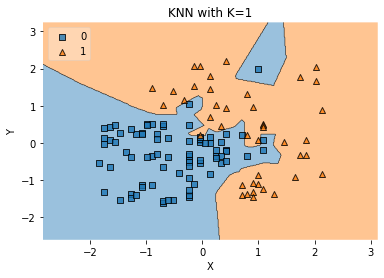



K = 2
Train Accuracy : 0.8157894736842105
Cross Validation Score : 0.8143939393939394


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


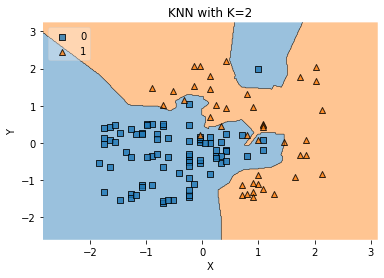



K = 3
Train Accuracy : 0.868421052631579
Cross Validation Score : 0.9022727272727271


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


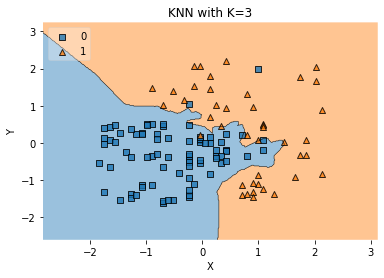



K = 4
Train Accuracy : 0.8508771929824561
Cross Validation Score : 0.8568181818181818


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


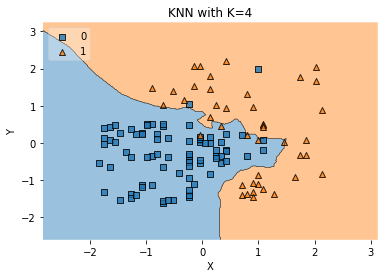



K = 5
Train Accuracy : 0.8859649122807017
Cross Validation Score : 0.8575757575757574


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


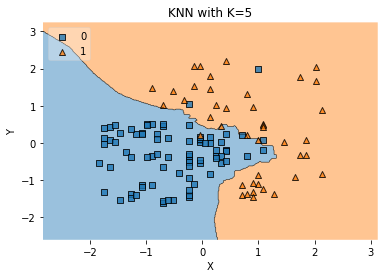



K = 6
Train Accuracy : 0.8859649122807017
Cross Validation Score : 0.8575757575757574


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


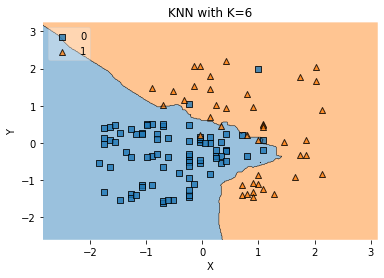



K = 7
Train Accuracy : 0.8947368421052632
Cross Validation Score : 0.8742424242424243


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


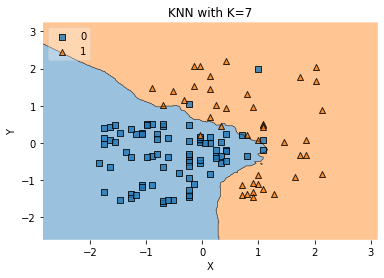



K = 8
Train Accuracy : 0.8859649122807017
Cross Validation Score : 0.8477272727272727


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


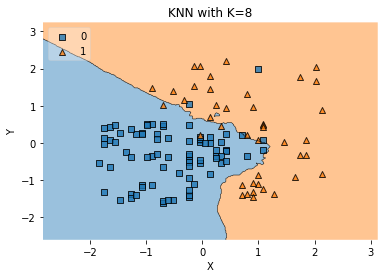



K = 9
Train Accuracy : 0.8947368421052632
Cross Validation Score : 0.8568181818181818


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


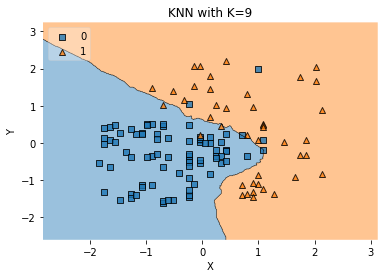



K = 10
Train Accuracy : 0.8771929824561403
Cross Validation Score : 0.8386363636363636


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


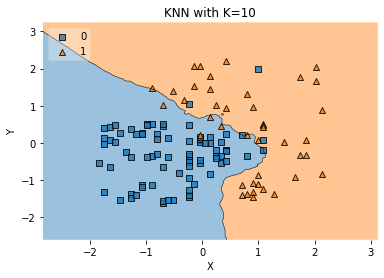



K = 11
Train Accuracy : 0.8859649122807017
Cross Validation Score : 0.8477272727272727


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


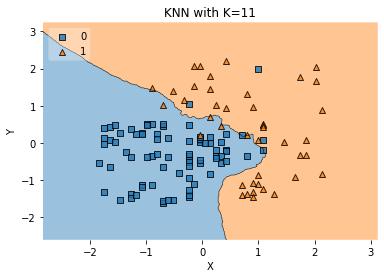



K = 12
Train Accuracy : 0.8771929824561403
Cross Validation Score : 0.8393939393939395


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


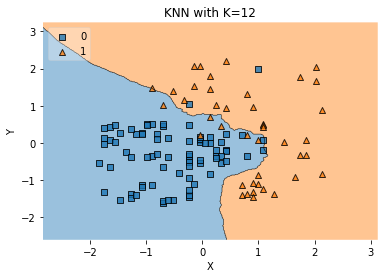



K = 13
Train Accuracy : 0.8771929824561403
Cross Validation Score : 0.8568181818181818


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


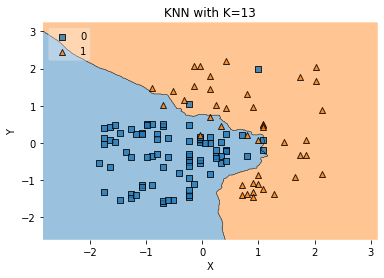



K = 14
Train Accuracy : 0.868421052631579
Cross Validation Score : 0.8136363636363637


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


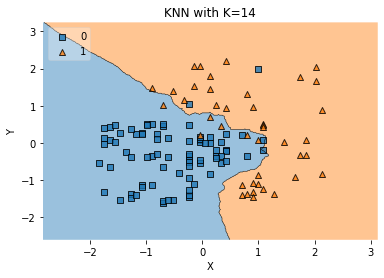



K = 15
Train Accuracy : 0.8771929824561403
Cross Validation Score : 0.8219696969696969


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


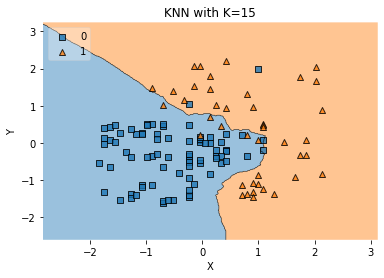



K = 16
Train Accuracy : 0.868421052631579
Cross Validation Score : 0.8136363636363637


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


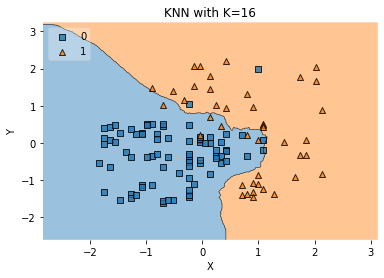



K = 17
Train Accuracy : 0.8771929824561403
Cross Validation Score : 0.8136363636363637


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


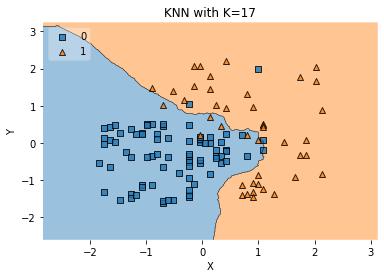



K = 18
Train Accuracy : 0.868421052631579
Cross Validation Score : 0.7962121212121213


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


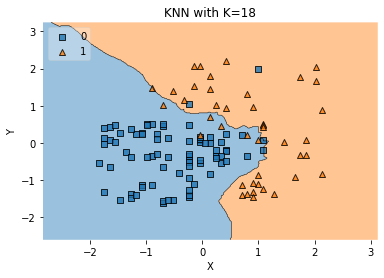



K = 19
Train Accuracy : 0.868421052631579
Cross Validation Score : 0.8136363636363637


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


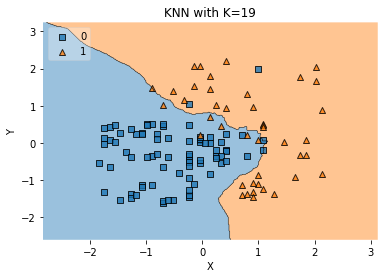



K = 20
Train Accuracy : 0.8421052631578947
Cross Validation Score : 0.7696969696969698


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


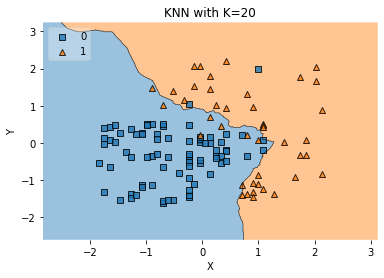

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in range(1,21):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train_scaled, y_train)
  # evaluating the model
  print('K =',i)
  print('Train Accuracy :', knn.score(X_test_scaled,y_test))
  print('Cross Validation Score :', np.mean(cross_val_score(knn, X_test_scaled, y_test, cv = 10)))
  value=1.5
  width=0.75
  plot_decision_regions(X_train_scaled, y_train, clf = knn, legend=2, feature_index=[1,2],
              filler_feature_values={0: value},
              filler_feature_ranges={0: width})
  plt.xlabel('X') 
  plt.ylabel('Y') 
  plt.title('KNN with K='+ str(i))
  plt.show()
  print('\n')

From the above calculated cross validation scores for K = 1 to 20 models, we can see that K = 3 model gives the highest cross validation score of 0.90. 

Therefore, K = 3 is the best model for this data.

Fitting the model for K = 3

In [21]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print('Train Accuracy :', knn.score(X_test_scaled,y_test))

Train Accuracy : 0.868421052631579


In [23]:
print('Cross Validation Score :', np.mean(cross_val_score(knn, X_test_scaled, y_test, cv = 10)))

Cross Validation Score : 0.9022727272727271
